Batch Normalization mainly to solve the gradient vanishing problem

# The following is to demonstrate the difference of normalizing and not normalizing

In [0]:
import numpy as np
import matplotlib.pyplot as plt

In [0]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

pixelVals=np.linspace(0,255,256)
pixelValsNormalized=np.linspace(0,1,256)

vals=[]
valsNormalized=[]
for (val,val1) in zip(pixelVals,pixelValsNormalized):
  vals.append(sigmoid(val))
  valsNormalized.append(sigmoid(val1))

Text(0.5, 1.0, 'normalized value')

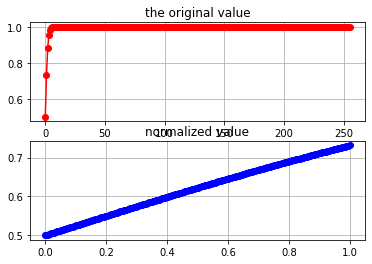

In [18]:
plt.subplot(211)
plt.plot(pixelVals,vals,'r-o')
plt.grid()
plt.title("the original value")
plt.subplot(212)
plt.plot(pixelValsNormalized,valsNormalized,'b-o')
plt.grid()
plt.title("normalized value")

In [0]:
try:
  %tensorflow_version 2.x
except:
  pass

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow.keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import normalize,to_categorical

In [0]:
(x_training,y_training),(x_testing,y_testing)=cifar10.load_data()

In [0]:
classNames=["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

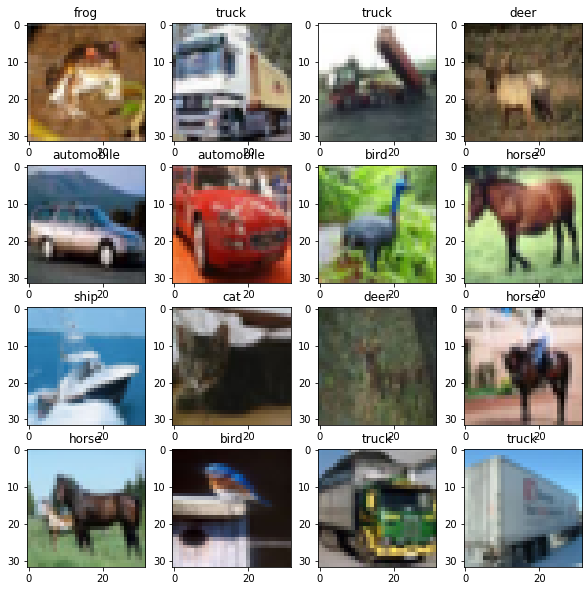

In [23]:
def plotImages(rs,cs,dataset):
  fig,ax=plt.subplots(rs,cs,figsize=(10,10))
  nums=rs*cs
  i=0
  for r in range(rs):
    for c in range(cs):
      ax[r,c].imshow(dataset[i])
      ax[r,c].set_title(classNames[y_training[i][0]])
      i=i+1

plotImages(4,4,x_training)

In [0]:
x_training,x_testing=normalize(x_training,axis=1),normalize(x_testing,axis=1)

y_training=to_categorical(y_training)
y_testing=to_categorical(y_testing)

In order to improve the model's generalization ability, we will try to randomly shift, flip and zoom in/out of the image

In [0]:
train_datagen=ImageDataGenerator(
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

train_datagen.fit(x_training)

train_generator=train_datagen.flow(
    x_training,
    y_training,
    batch_size=32
)

In [0]:
steps=x_training.shape[0]//64

In [0]:
def build_model(batch_normalization,activation):
  model=Sequential()
  model.add(Conv2D(32,3,activation=activation,
                   padding="same",input_shape=(32,32,3)))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(Conv2D(32,3,activation=activation,
                   padding='same',kernel_initializer='he_uniform'))
  model.add(MaxPooling2D())
  model.add(Conv2D(64,3,activation=activation,
                   padding='same',kernel_initializer='he_uniform'))
  if batch_normalization:
    model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128,activation=activation,kernel_initializer='he_uniform'))
  model.add(Dense(10,activation='softmax'))
  return model

build a model without batchNormalization

In [42]:
sig_model=build_model(batch_normalization=False,activation='sigmoid')
sig_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

sig_history=sig_model.fit_generator(train_generator,
                        steps_per_epoch=steps,
                        epochs=10,
                        validation_data=(x_testing,y_testing))

  ...
    to  
  ['...']
Train for 781 steps, validate on 10000 samples
Epoch 1/10
781/781 [==============================] - 13s 17ms/step - loss: 2.3228 - accuracy: 0.0988 - val_loss: 2.3054 - val_accuracy: 0.1000
Epoch 2/10
781/781 [==============================] - 13s 16ms/step - loss: 2.3114 - accuracy: 0.0993 - val_loss: 2.3144 - val_accuracy: 0.1000
Epoch 3/10
781/781 [==============================] - 13s 16ms/step - loss: 2.3104 - accuracy: 0.1026 - val_loss: 2.3109 - val_accuracy: 0.1000
Epoch 4/10
781/781 [==============================] - 13s 16ms/step - loss: 2.3116 - accuracy: 0.0969 - val_loss: 2.3077 - val_accuracy: 0.1000
Epoch 5/10
781/781 [==============================] - 13s 16ms/step - loss: 2.3115 - accuracy: 0.1023 - val_loss: 2.3084 - val_accuracy: 0.1000
Epoch 6/10
781/781 [==============================] - 13s 16ms/step - loss: 2.3106 - accuracy: 0.0988 - val_loss: 2.3107 - val_accuracy: 0.1000
Epoch 7/10
781/781 [==============================] - 13s 16ms/s

In [0]:
def accuracy_loss_cal(model_history):
  loss=model_history.history['loss']
  val_loss=model_history.history['val_loss']

  acc=model_history.history['accuracy']
  val_acc=model_history.history['val_accuracy']

  return loss,val_loss,acc,val_acc


In [0]:
def plot_performance(loss,val_loss,acc,val_acc):
  plt.style.use('dark_background')
  fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
  epochs=range(1,len(loss)+1)
  ax1.plot(epochs,loss,'y-o',label='training_loss')
  ax1.plot(epochs,val_loss,'r-o',label='validation_loss')
  ax1.set_title('Training/Validation Loss')
  ax1.legend(loc='upper right')

  ax2.plot(epochs,acc,'y-s',label='training_acc')
  ax2.plot(epochs,val_acc,'r-s',label='validation_acc')
  ax2.set_title("Training/Validation Accuracy")
  ax2.legend(loc='upper right')

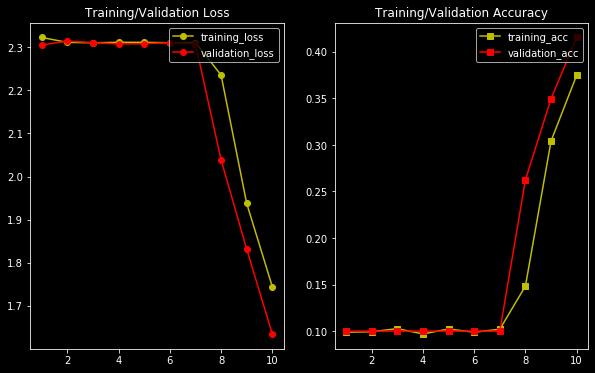

In [74]:
plot_performance(loss,val_loss,acc,val_acc)

Building a model with BatchNormalization

In [76]:
sig_model=build_model(batch_normalization=True,activation='sigmoid')

sig_model.compile(optimizer='rmsprop',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
sig_history=sig_model.fit_generator(train_generator,
                                    steps_per_epoch=steps,
                                    epochs=10,
                                    validation_data=(x_testing,y_testing)
                                    )


  ...
    to  
  ['...']
Train for 781 steps, validate on 10000 samples
Epoch 1/10
781/781 [==============================] - 14s 18ms/step - loss: 1.6682 - accuracy: 0.4091 - val_loss: 1.7501 - val_accuracy: 0.3664
Epoch 2/10
781/781 [==============================] - 13s 17ms/step - loss: 1.3229 - accuracy: 0.5323 - val_loss: 1.9986 - val_accuracy: 0.3957
Epoch 3/10
781/781 [==============================] - 13s 16ms/step - loss: 1.1623 - accuracy: 0.5920 - val_loss: 1.6492 - val_accuracy: 0.4469
Epoch 4/10
781/781 [==============================] - 13s 17ms/step - loss: 1.0775 - accuracy: 0.6233 - val_loss: 1.2247 - val_accuracy: 0.5968
Epoch 5/10
781/781 [==============================] - 13s 17ms/step - loss: 1.0293 - accuracy: 0.6406 - val_loss: 1.1568 - val_accuracy: 0.5894
Epoch 6/10
781/781 [==============================] - 13s 17ms/step - loss: 0.9898 - accuracy: 0.6557 - val_loss: 1.0544 - val_accuracy: 0.6313
Epoch 7/10
781/781 [==============================] - 13s 17ms/s

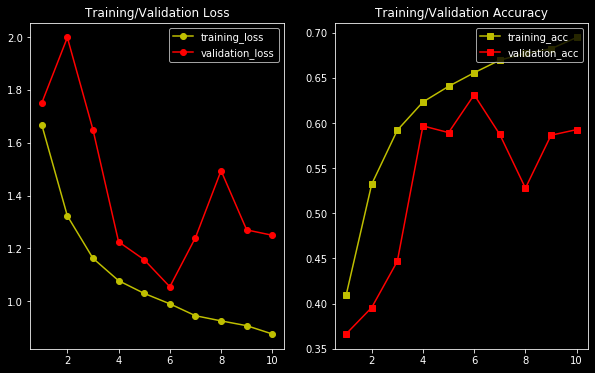

In [78]:
loss,val_loss,acc,val_acc=accuracy_loss_cal(sig_history)
plot_performance(loss,val_loss,acc,val_acc)